In [92]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as make_subplots
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import make_scorer
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score, f1_score, roc_auc_score, classification_report, plot_roc_curve
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler





In [2]:
df=pd.read_csv("/content/UCI_Credit_Card.csv")
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [3]:
df.shape



(30000, 25)

In [4]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [5]:
df.info

<bound method DataFrame.info of           ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1    20000.0    2          2         1   24      2      2     -1   
1          2   120000.0    2          2         2   26     -1      2      0   
2          3    90000.0    2          2         2   34      0      0      0   
3          4    50000.0    2          2         1   37      0      0      0   
4          5    50000.0    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996   220000.0    1          3         1   39      0      0      0   
29996  29997   150000.0    1          3         2   43     -1     -1     -1   
29997  29998    30000.0    1          2         2   37      4      3      2   
29998  29999    80000.0    1          3         1   41      1     -1      0   
29999  30000    50000.0    1          2         1   46      0      0      0   

       PAY_4  ...  

DATA CLEANING

In [6]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

no null values in any column

In [7]:
df.dtypes

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

In [8]:
fill = (df.EDUCATION == 0) | (df.EDUCATION == 5) | (df.EDUCATION == 6)
df.loc[fill, 'EDUCATION'] = 4

print('EDUCATION ' + str(sorted(df['EDUCATION'].unique())))


EDUCATION [1, 2, 3, 4]


In [9]:
df = df.rename(columns={'default.payment.next.month': 'DEFAULT', 
                        'PAY_0': 'PAY_SEP'})
df.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEP,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


data types are in right format

not much cleaning required for this dataset so we are moving to data encoding 

As all the feature has continous values there is no encoding needed for this dataset

**checkiing duplicate values**

In [10]:
# Checking Duplicate Values
value=len(df[df.duplicated()])
print("The number of duplicate values in the data set is = ",value)


The number of duplicate values in the data set is =  0


there are no duplicate value in the data set

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.842267,0.744494,1.0,1.00,2.0,2.00,4.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_SEP,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


**checking correlations**

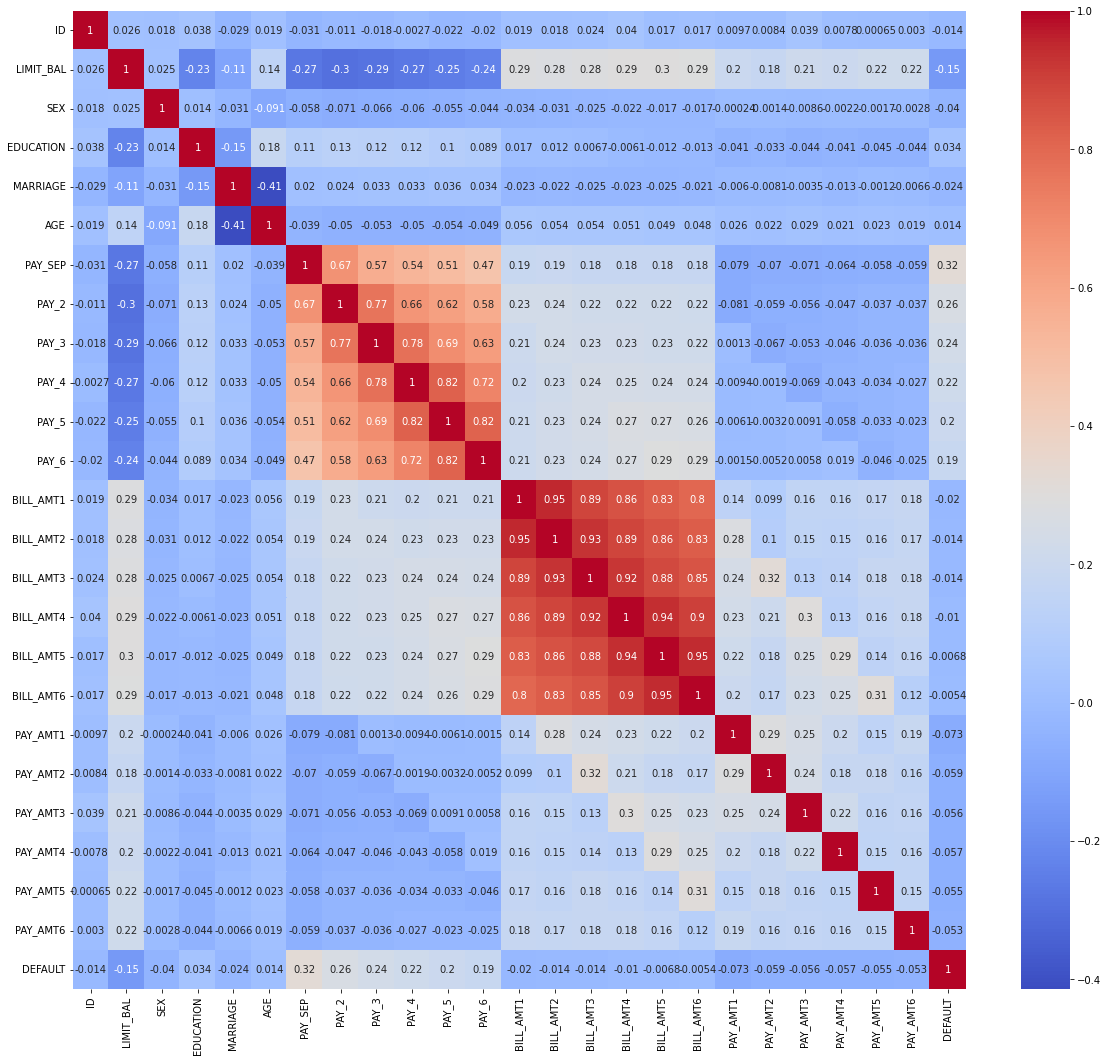

In [12]:
plt.figure(figsize=(20,18))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.show()


# **EDA**

DIISTRIBUTION OF EVERY FEATURE

## **univariant analysis**

In [13]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEP',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')

In [14]:
print('SEX' + str(sorted(df['SEX'].unique())))
print('EDUCATION' + str(sorted(df['EDUCATION'].unique())))
print('MARRIAGE' + str(sorted(df['MARRIAGE'].unique())))


SEX[1, 2]
EDUCATION[1, 2, 3, 4]
MARRIAGE[0, 1, 2, 3]


**column1 LIMIT_BAL**

In [15]:

fig_LIMIT_BAL=px.histogram(df,x=df['LIMIT_BAL'],title='distribution of LIMIT_BAL')
fig_LIMIT_BAL

**column 2 SEX**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



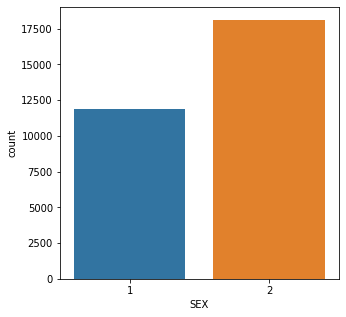

In [16]:
plt.figure(figsize=(5,5))
sns.countplot(df['SEX'])

1-MALE 2-MALE

**COLUMN  3 EDUCATION**

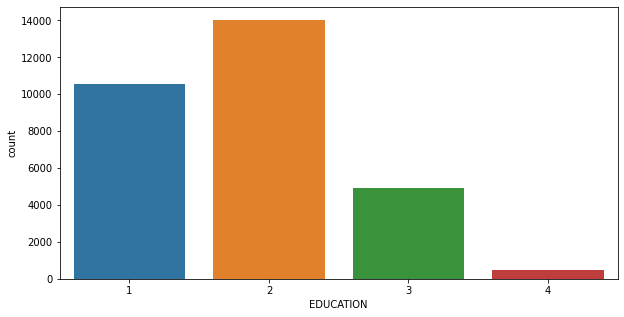

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'EDUCATION', data = df)


More number of credit holders are university students followed by Graduates and then High school students.


**Column 4 -MARRIAGE**

MARRIAGE [1, 2, 3]


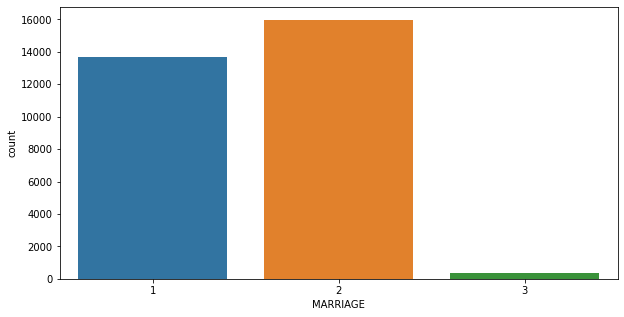

In [18]:
fill = (df.MARRIAGE ==0) 
df.loc[fill, 'MARRIAGE'] = 3

print('MARRIAGE ' + str(sorted(df['MARRIAGE'].unique())))




plt.figure(figsize=(10,5))
sns.countplot(x = 'MARRIAGE', data = df)


From the above data analysis we can say that

1 - married
2 - single
3 - others.

More number of credit cards holder are Single.

**COLUMN 5- AGE**

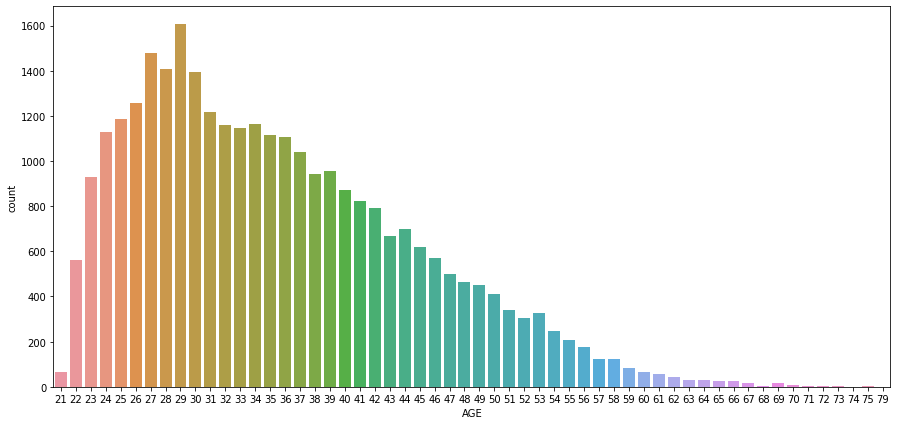

In [19]:
plt.figure(figsize=(15,7))
sns.countplot(x = 'AGE', data = df)
plt.show()


We can see more number of credit cards holder age are between 26-30 years old.
Age above 60 years old rarely uses the credit card.


**Renaming columns**

In [20]:
df.rename(columns={'PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
#df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
#df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)


column 6 to 11:
pay sep to pay APR

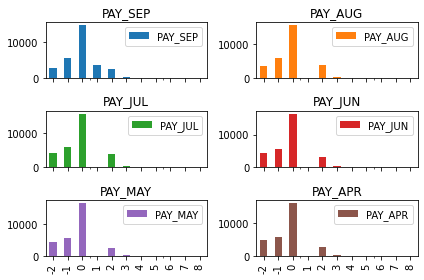

In [21]:
df.iloc[:,6:12].apply(pd.value_counts).plot(kind="bar", subplots=True, layout=(3,2), legend=True)

plt.tight_layout()  
plt.show()


COLUMN 12 TO 17 
BILL AMOUNT 1 TO BILL AMOUNT 6

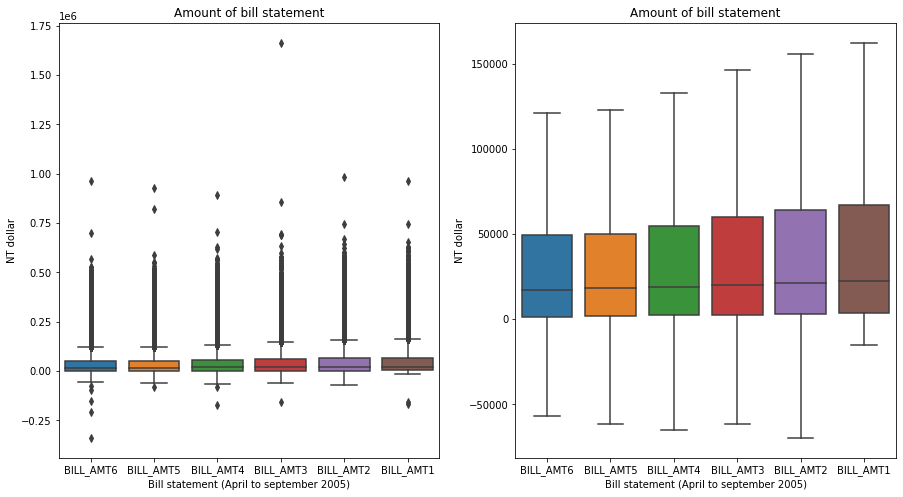

In [22]:
plt.rcParams["figure.figsize"] = [15,8]
plt.subplot(1, 2, 1) # index 1
sns.boxplot( data=df.iloc[:,12:18], 
            order=["BILL_AMT6","BILL_AMT5","BILL_AMT4","BILL_AMT3","BILL_AMT2","BILL_AMT1"])
plt.title("Amount of bill statement")
plt.xlabel("Bill statement (April to september 2005)")
plt.ylabel("NT dollar")


plt.subplot(1, 2, 2) # index 2
sns.boxplot( data=df.iloc[:,12:18],
            showfliers=False,
            order=["BILL_AMT6","BILL_AMT5","BILL_AMT4","BILL_AMT3","BILL_AMT2","BILL_AMT1"])
plt.title("Amount of bill statement")
plt.xlabel("Bill statement (April to september 2005)")
plt.ylabel("NT dollar")

plt.show() 


COLUMN 18 TO 23:
PAY_AMT 1 TO PAY_AMT 6

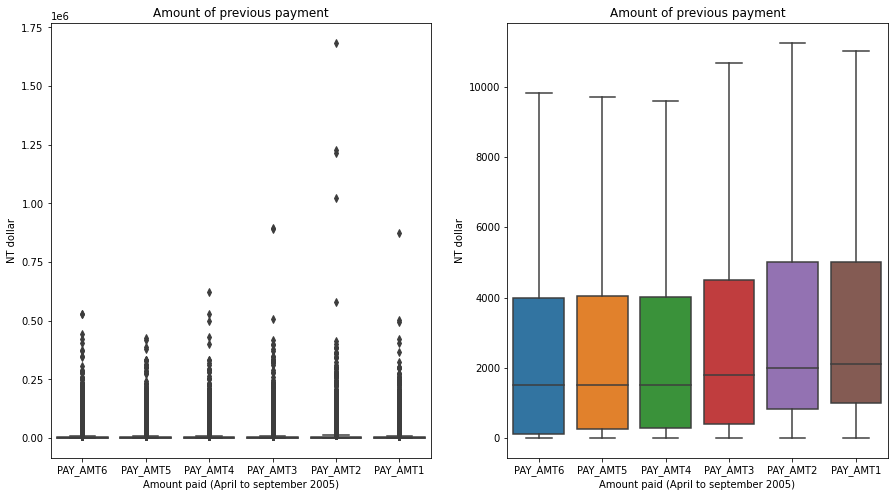

In [23]:
plt.rcParams["figure.figsize"] = [15,8]
plt.subplot(1, 2, 1) # index 1
sns.boxplot( data=df.iloc[:,18:24], 
            order=["PAY_AMT6","PAY_AMT5","PAY_AMT4","PAY_AMT3","PAY_AMT2","PAY_AMT1"])
plt.title("Amount of previous payment")
plt.xlabel("Amount paid (April to september 2005)")
plt.ylabel("NT dollar")


plt.subplot(1, 2, 2) # index 2
sns.boxplot( data=df.iloc[:,18:24],
            showfliers=False,
            order=["PAY_AMT6","PAY_AMT5","PAY_AMT4","PAY_AMT3","PAY_AMT2","PAY_AMT1"])
plt.title("Amount of previous payment")
plt.xlabel("Amount paid (April to september 2005)")
plt.ylabel("NT dollar")

plt.show()


In [24]:

value=df['DEFAULT'].value_counts()
name=df['DEFAULT'].unique()
fig_default=px.pie(df,values=value,names=name,color=name,title='distribution of default')
fig_default


## **Bivariant Analysis**

In [25]:
fig_limitbalvsdefault=px.histogram (df,x='LIMIT_BAL',y='DEFAULT',title='LIMIT_BAL vs DEFAULT')
fig_limitbalvsdefault


people have balance limit as 50 K are high defaulters

In [26]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEP',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'DEFAULT'],
      dtype='object')

In [27]:
x=pd.DataFrame(df.groupby('SEX')['DEFAULT'].mean())
y=df['SEX'].unique()
y=sorted(y)
data={'SEX':y,'Average_default':x['DEFAULT']}
temp=pd.DataFrame(data)
temp.sort_values('Average_default',inplace=True)
temp

,SEX,Average_default
SEX,,
2,2,0.207763
1,1,0.241672


In [28]:
fig_sexvsdefault=px.bar(temp,x='SEX',y='Average_default',color='SEX',width=600,height=600)

fig_sexvsdefault

there is a linear relationship between age and default column

In [29]:
df['DEFAULT'].corr(df['SEX'])

-0.03996057770544164

-0.03 is a correlation between -2 to +2 which indicates a linear relationship

In [30]:
x1=pd.DataFrame(df.groupby('EDUCATION')['DEFAULT'].mean())
y1=df['EDUCATION'].unique()
y1=sorted(y1)
data1={'EDUCATION':y1,'Average_default':x1['DEFAULT']}
temp1=pd.DataFrame(data1)
temp1.sort_values('Average_default',inplace=True)
temp1

,EDUCATION,Average_default
EDUCATION,,
4,4,0.070513
1,1,0.192348
2,2,0.237349
3,3,0.251576


In [31]:
#fig_educationvsdefault=px.bar(temp1,x='EDUCATION',y='Average_default',color='EDUCATION',title='education vs default')
#fig_educationvsdefault

fig_EDUCATIONVSDEFAULT=go.Figure(data=[go.Scatter(x=temp1['EDUCATION'],y=temp1['Average_default'],mode='markers')])
fig_EDUCATIONVSDEFAULT.update_layout(
     updatemenus=[
                  dict(buttons=list([
                       
                                     dict(
                                         args=['type','bar'],
                                         label='Bar plot',
                                    
                                          method='restyle'

                                     ),
                                     dict(
                                         args=['type','scatter'],
                                         label='Scatter plot',
                                          method='restyle'

                                     )

                       ]
                           
                       )
                         
                        )
     ]
                
     
)
fig_EDUCATIONVSDEFAULT.show()


1=graduate school, 2=university, 3=high school, 4=others

In [32]:
df['EDUCATION'].corr(df['DEFAULT'])

0.033842229825675745

there is no clear linear relationship between education and default

In [33]:
x3=pd.DataFrame(df.groupby('MARRIAGE')['DEFAULT'].mean())
y3=df['MARRIAGE'].unique()
y3=sorted(y3)
data3={'MARRIAGE':y3,'Average_default':x3['DEFAULT']}
temp3=pd.DataFrame(data3)
temp3.sort_values('Average_default',inplace=True)
temp3

,MARRIAGE,Average_default
MARRIAGE,,
2,2,0.209283
1,1,0.234717
3,3,0.236074


In [34]:
#fig_educationvsdefault=px.bar(temp1,x='EDUCATION',y='Average_default',color='EDUCATION',title='education vs default')
#fig_educationvsdefault

fig_MARRIAGEVSDEFAULT=go.Figure(data=[go.Scatter(x=temp3['MARRIAGE'],y=temp3['Average_default'],mode='markers')])
fig_MARRIAGEVSDEFAULT.update_layout(
     updatemenus=[
                  dict(buttons=list([
                       
                                     dict(
                                         args=['type','bar'],
                                         label='Bar plot',
                                    
                                          method='restyle'

                                     ),
                                     dict(
                                         args=['type','scatter'],
                                         label='Scatter plot',
                                          method='restyle'

                                     )

                       ]
                           
                       )
                         
                        )
     ]
                
     
)
fig_EDUCATIONVSDEFAULT.show()


In [35]:
df['MARRIAGE'].corr(df['DEFAULT'])

-0.027574706154478473

there is no linear relationship between marriage and default

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f29af70df90>,
      dtype=object)

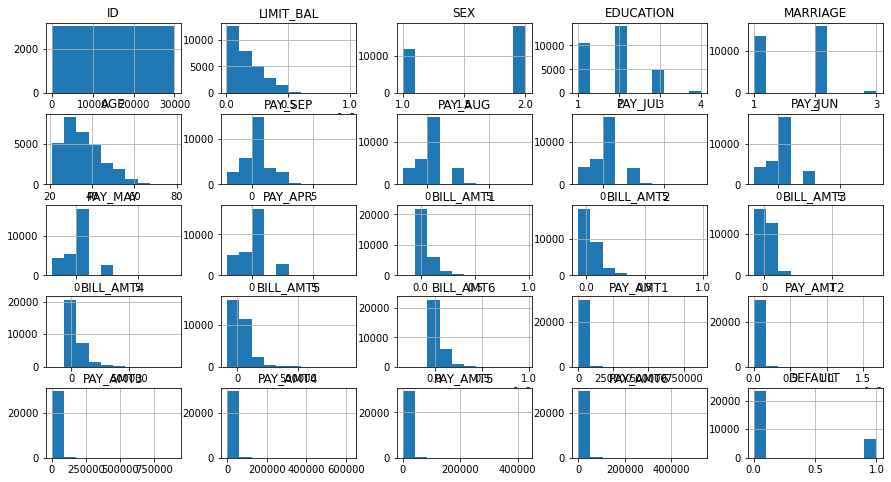

In [36]:
df.hist(bins = 10)

In [37]:
df=df.drop(['ID'],axis=1)

**Splitting the data**

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[df.columns[:-1]].values, df['DEFAULT'].values, test_size=0.20, random_state=777)
x_train.shape, x_test.shape
#y_train.shape,y_test.shape


((24000, 23), (6000, 23))

**Scaling the data**

In [39]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #initialising
 # find the values of mu and sigma
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# **LOGISTIC REGRESSION**

In [94]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)


LogisticRegression()

In [41]:
log_reg.predict(x_test)


array([0, 0, 0, ..., 0, 0, 0])

In [42]:
df_pred=pd.DataFrame({'Actual':y_test,'Predicted':log_reg.predict(x_test)})
df_pred


,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
5995,0,0
5996,0,0
5997,0,0
5998,0,0


In [43]:
y_test_prediction=log_reg.predict(x_test)
y_test_prediction


array([0, 0, 0, ..., 0, 0, 0])

In [44]:
y_pred_proba=log_reg.predict_log_proba(x_test)
y_pred_proba


array([[-0.28607468, -1.39113211],
       [-0.09813792, -2.37004915],
       [-0.17215509, -1.8442025 ],
       ...,
       [-0.21381363, -1.64765322],
       [-0.19243699, -1.74266247],
       [-0.12280484, -2.15793295]])

In [45]:
roc_auc_score(y_test,log_reg.predict_log_proba(x_test)[:,1])


0.7359789964038376

In [48]:
cnfusion_matrix = confusion_matrix(y_test, log_reg.predict(x_test))
cnfusion_matrix


array([[4606,  110],
       [ 966,  318]])

**FEATURE SELECTION BY LOGISTIC REGRESSION**

In [49]:
estimator=LogisticRegression()
sfs=SequentialFeatureSelector(estimator,n_features_to_select=4)
sfs.fit(x_train,y_train)
list(zip(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEP',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],sfs.get_support()))


[('LIMIT_BAL', False),
 ('SEX', False),
 ('EDUCATION', True),
 ('MARRIAGE', False),
 ('AGE', False),
 ('PAY_SEP', True),
 ('PAY_AUG', False),
 ('PAY_JUL', False),
 ('PAY_JUN', False),
 ('PAY_MAY', False),
 ('PAY_APR', False),
 ('BILL_AMT1', False),
 ('BILL_AMT2', False),
 ('BILL_AMT3', False),
 ('BILL_AMT4', False),
 ('BILL_AMT5', False),
 ('BILL_AMT6', False),
 ('PAY_AMT1', False),
 ('PAY_AMT2', False),
 ('PAY_AMT3', False),
 ('PAY_AMT4', False),
 ('PAY_AMT5', True),
 ('PAY_AMT6', True)]

# **KNN Classifier**

In [50]:
def knn_classifier(data, k):
   from sklearn.neighbors import KNeighborsClassifier
   x = df[df.columns[:-1]].values # independent features
   y = df['DEFAULT'].astype(int).values # y -> target/true labels 
   clf = KNeighborsClassifier(n_neighbors=k) #it will initialise the model with @neighbours as k 
   clf.fit(x, y) # train the model
   print("K : ", k, " Train Accuracy : ", clf.score(x,y), " Val Accuracy : ", np.mean(cross_val_score(clf, x, y, cv=5)))  # test the model and it computes the accuracy (train data accuracy)
  

In [51]:
from sklearn.metrics import roc_auc_score
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  knn = KNeighborsClassifier(i) #initialising the model
  knn.fit(x_train,y_train) # training the model
  print("K value  : " , i, " score : ", roc_auc_score(y_test, knn.predict_proba(x_test)[:,1])) #predicting using the model


K value  :  1  score :  0.6052541358509111
K value  :  2  score :  0.6554441828573241
K value  :  3  score :  0.676309141148711
K value  :  4  score :  0.6893627348008635
K value  :  5  score :  0.7057854186318728
K value  :  6  score :  0.7151498742267987
K value  :  7  score :  0.727537527182601
K value  :  8  score :  0.7344401077791782
K value  :  9  score :  0.7402854404307997
K value  :  10  score :  0.7439854779513765
K value  :  20  score :  0.7605946912347177
K value  :  50  score :  0.7685815207195495


In [52]:
estimator=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=4)
sfs=SequentialFeatureSelector(estimator,n_features_to_select=4)
sfs.fit(x_train,y_train)
list(zip(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEP',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],sfs.get_support()))

[('LIMIT_BAL', False),
 ('SEX', False),
 ('EDUCATION', False),
 ('MARRIAGE', True),
 ('AGE', True),
 ('PAY_SEP', True),
 ('PAY_AUG', False),
 ('PAY_JUL', True),
 ('PAY_JUN', False),
 ('PAY_MAY', False),
 ('PAY_APR', False),
 ('BILL_AMT1', False),
 ('BILL_AMT2', False),
 ('BILL_AMT3', False),
 ('BILL_AMT4', False),
 ('BILL_AMT5', False),
 ('BILL_AMT6', False),
 ('PAY_AMT1', False),
 ('PAY_AMT2', False),
 ('PAY_AMT3', False),
 ('PAY_AMT4', False),
 ('PAY_AMT5', False),
 ('PAY_AMT6', False)]

# **NAIVE  BAYES**

In [60]:
classifier = GaussianNB() 
classifier.fit(x_train, y_train) 

GaussianNB()

In [61]:
y_pred  =  classifier.predict(x_test)
classifier.predict_proba(x_test)

array([[3.62744240e-01, 6.37255760e-01],
       [9.99638640e-01, 3.61360192e-04],
       [1.57967972e-01, 8.42032028e-01],
       ...,
       [7.03815402e-01, 2.96184598e-01],
       [6.42947518e-01, 3.57052482e-01],
       [9.10792915e-01, 8.92070853e-02]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



0.5094515029439108

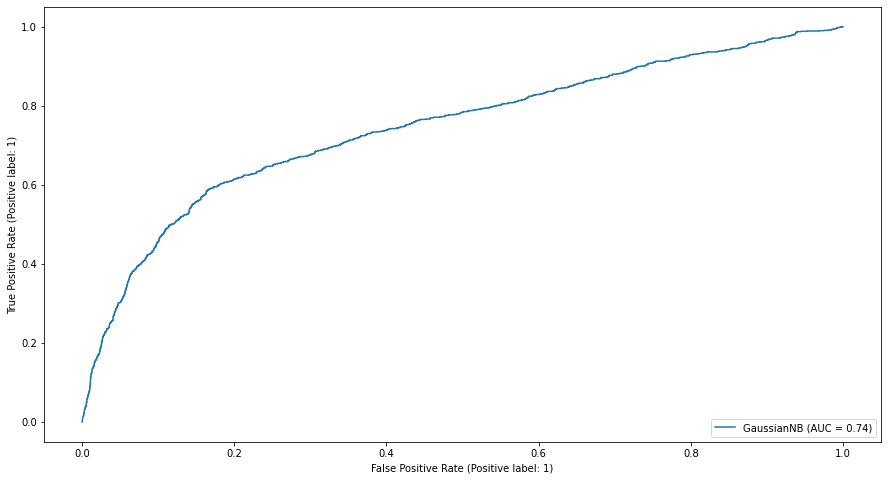

In [64]:
cm = confusion_matrix(y_test, y_pred)
cm
ac = accuracy_score(y_test,y_pred)
ac
roc_auc_score(y_test, classifier.predict_proba(x_test)[:, 1])
# #print(classification_report(y_test, y_pred))
plot_roc_curve(classifier, x_test, y_test) 
f1_score(y_test,y_pred)

FEATURE IMPORTANCE BY NAIVE BAYES

In [65]:
estimator=GaussianNB()
sfs=SequentialFeatureSelector(estimator,n_features_to_select=4)
sfs.fit(x_train,y_train)
list(zip(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEP',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],sfs.get_support()))

[('LIMIT_BAL', False),
 ('SEX', False),
 ('EDUCATION', False),
 ('MARRIAGE', False),
 ('AGE', False),
 ('PAY_SEP', True),
 ('PAY_AUG', False),
 ('PAY_JUL', False),
 ('PAY_JUN', False),
 ('PAY_MAY', False),
 ('PAY_APR', True),
 ('BILL_AMT1', False),
 ('BILL_AMT2', True),
 ('BILL_AMT3', False),
 ('BILL_AMT4', True),
 ('BILL_AMT5', False),
 ('BILL_AMT6', False),
 ('PAY_AMT1', False),
 ('PAY_AMT2', False),
 ('PAY_AMT3', False),
 ('PAY_AMT4', False),
 ('PAY_AMT5', False),
 ('PAY_AMT6', False)]

## **BAGGING**

In [68]:
model = BaggingClassifier(tree.DecisionTreeClassifier(max_depth = 1, random_state=1), n_estimators=100)
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.8295

### **RANDOM FOREST CLASSIFIER**

In [69]:
rf=RandomForestClassifier(n_estimators=10,max_depth=2,max_features='sqrt')
rf.fit(x_train,y_train)


RandomForestClassifier(max_depth=2, max_features='sqrt', n_estimators=10)

In [70]:
y_predrf=rf.predict(x_test)
y_predrf


array([0, 0, 0, ..., 0, 0, 0])

In [71]:
dfrf=pd.DataFrame({"Actual":y_test,"Predicted":y_predrf})
dfrf


,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
5995,0,0
5996,0,0
5997,0,0
5998,0,0


In [72]:
rfproba=rf.predict_proba(x_test)
rfproba


array([[0.81590775, 0.18409225],
       [0.85479353, 0.14520647],
       [0.79981002, 0.20018998],
       ...,
       [0.83835337, 0.16164663],
       [0.84173011, 0.15826989],
       [0.82260435, 0.17739565]])

EVALUATION METRIC

In [73]:
roc_auc_score(y_test,rfproba[:,1])


0.7752619834645232

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



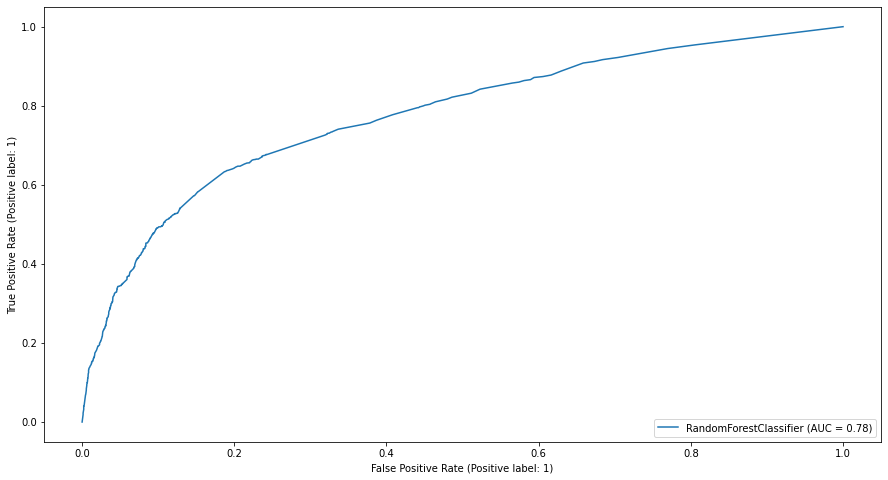

In [74]:
plot_roc_curve(rf,x_test,y_test)


In [75]:
cnf_matrix = confusion_matrix(y_test,rf.predict(x_test))
cnf_matrix


array([[4593,  123],
       [1009,  275]])

In [78]:
df_list=df[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEP','PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]

**FEATURE IMPORTANCE BY RANDOM FOREST CLASSIFIER**

In [79]:
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(df_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


Variable: PAY_AUG              Importance: 0.31
Variable: PAY_SEP              Importance: 0.24
Variable: PAY_JUN              Importance: 0.24
Variable: PAY_MAY              Importance: 0.08
Variable: PAY_AMT1             Importance: 0.03
Variable: LIMIT_BAL            Importance: 0.02
Variable: PAY_JUL              Importance: 0.01
Variable: PAY_APR              Importance: 0.01
Variable: PAY_AMT2             Importance: 0.01
Variable: PAY_AMT4             Importance: 0.01
Variable: PAY_AMT5             Importance: 0.01
Variable: PAY_AMT6             Importance: 0.01
Variable: SEX                  Importance: 0.0
Variable: EDUCATION            Importance: 0.0
Variable: MARRIAGE             Importance: 0.0
Variable: AGE                  Importance: 0.0
Variable: BILL_AMT1            Importance: 0.0
Variable: BILL_AMT2            Importance: 0.0
Variable: BILL_AMT3            Importance: 0.0
Variable: BILL_AMT4            Importance: 0.0
Variable: BILL_AMT5            Importance: 0.0
V

# **GRADIENT BOOSTING**

In [80]:
from sklearn.ensemble import GradientBoostingRegressor
for lr in [0.01,0.05,0.1,0.3,0.5,0.8,1]:
  model= GradientBoostingRegressor(learning_rate=lr)
  model.fit(x_train, y_train)
  print("Learning rate : ", lr, " Train score : ", model.score(x_train,y_train), " Test score : ", model.score(x_test,y_test))

Learning rate :  0.01  Train score :  0.17615997319752985  Test score :  0.1874253212077588
Learning rate :  0.05  Train score :  0.23213085388815569  Test score :  0.23782742859341233
Learning rate :  0.1  Train score :  0.24800977327787532  Test score :  0.24057349903767344
Learning rate :  0.3  Train score :  0.2853781536140476  Test score :  0.2358984926368347
Learning rate :  0.5  Train score :  0.3096814608842591  Test score :  0.21911616606320017
Learning rate :  0.8  Train score :  0.33666909597957095  Test score :  0.1686818545042078
Learning rate :  1  Train score :  0.34335621583981124  Test score :  0.12944990598153006


# **XG BOOST CLASSIFIER**

In [83]:
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(x_train,y_train) #train the model
  model.score(x_test, y_test) # scoring the model - r2 squared
  print("Learning rate : ", lr, " Train score : ", model.score(x_train,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, x_train, y_train, cv=10)))

Learning rate :  0.01  Train score :  0.8200416666666667  Cross-Val score :  0.8192499999999999
Learning rate :  0.02  Train score :  0.8204583333333333  Cross-Val score :  0.8196666666666668
Learning rate :  0.03  Train score :  0.821125  Cross-Val score :  0.8200833333333332
Learning rate :  0.04  Train score :  0.8213333333333334  Cross-Val score :  0.8202916666666666
Learning rate :  0.05  Train score :  0.8220833333333334  Cross-Val score :  0.8202083333333334
Learning rate :  0.1  Train score :  0.8225416666666666  Cross-Val score :  0.82
Learning rate :  0.11  Train score :  0.8225416666666666  Cross-Val score :  0.8203333333333334
Learning rate :  0.12  Train score :  0.82275  Cross-Val score :  0.8201666666666666
Learning rate :  0.13  Train score :  0.824  Cross-Val score :  0.8204583333333334
Learning rate :  0.14  Train score :  0.8240833333333333  Cross-Val score :  0.8192916666666665
Learning rate :  0.15  Train score :  0.8235  Cross-Val score :  0.8195
Learning rate :  

In [103]:
xgbmodel = XGBClassifier(learning_rate = 0.05, n_estimators=100, verbosity = 0)
xgbmodel.fit(x_train,y_train) #train the model
xgbmodel.score(x_test, y_test) # scoring the model - r2 squared

0.8305

**FEATURE IMPORTANCE BY XG BOOSTER**

In [104]:
importances = xgbmodel.feature_importances_
#importances
pd.DataFrame({'Important_features':xgbmodel.feature_importances_},index = df.columns[:-1]).sort_values(by='Important_features' , ascending = False)


,Important_features
PAY_SEP,0.361311
PAY_AUG,0.168816
PAY_JUL,0.054296
PAY_JUN,0.040593
PAY_AMT3,0.038695
PAY_MAY,0.038077
PAY_APR,0.031324
PAY_AMT1,0.030909
PAY_AMT2,0.030121
PAY_AMT4,0.028222


# **VOTING CLASSIFIER**

In [101]:
from sklearn.ensemble import VotingClassifier # this is the function that ensembles my model
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

model1 = LogisticRegression(random_state=1)
model2= GradientBoostingClassifier(random_state=1)
model3 = RandomForestClassifier(max_depth = 2,random_state=1)
model4 = KNeighborsClassifier(3)
model5=XGBClassifier()
model6=GaussianNB()
model = VotingClassifier(estimators=[('log_clas', model1),('GB',model2),('rfc',model3),('knnc',model4),('XGB',model5),('GNB',model6)], voting='hard') # it will stitich all the models together, voting = hard means max voting 
# we need to give the list of models that we are trying to combine
model.fit(x_train,y_train) # to train all of the models
preds = model.predict(x_test)
model.score(x_test,y_test) # prediction

0.8236666666666667

# **FINAL PREDICTION**

XGBOOST classifier is the best model with high score of 0.8305

Two important features are PAY_SEP and PAY_AUG
